In [17]:
# Step 1: Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

# Load the dataset
file_path = 'Bank_Personal_Loan_Modelling.xlsx'
data = pd.read_excel(file_path, sheet_name='Data')

In [4]:
print("Dataset Overview:\n", data.head())

Dataset Overview:
    ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [6]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Drop irrelevant columns
data = data.drop(['ID', 'ZIP Code'], axis=1)
# Display the updated shape
print(data.shape)

(5000, 12)


In [8]:
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
                Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200     2.396400     1.937913   
std      11.463166    11.467954    46.033729     1.147663     1.747666   
min      23.000000    -3.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000

In [9]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


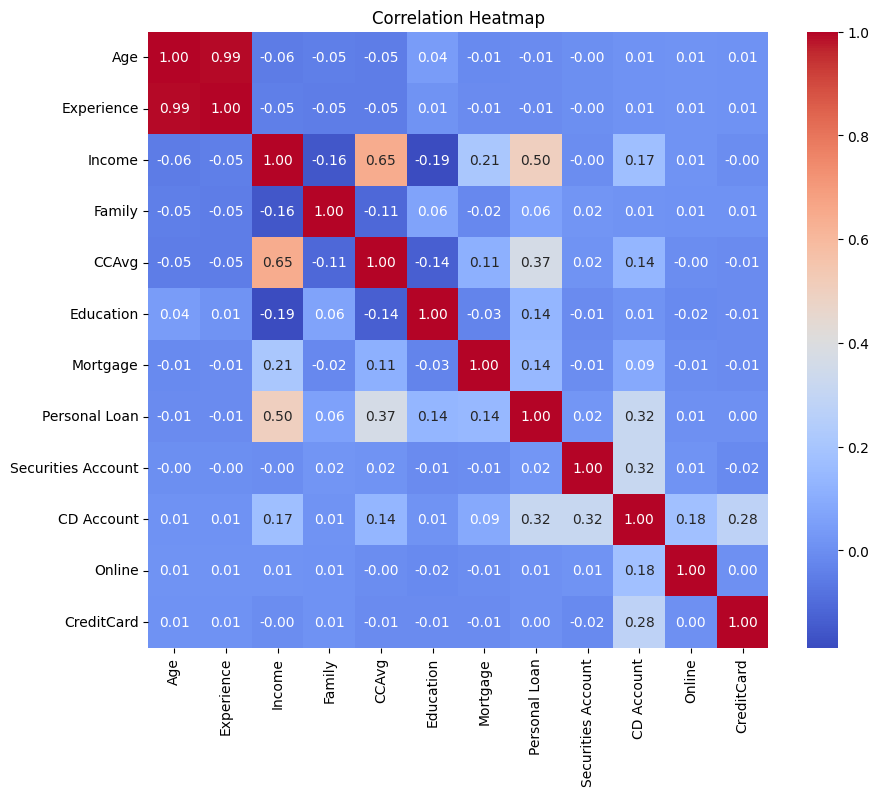

In [10]:
# Correlation heatmap to understand relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

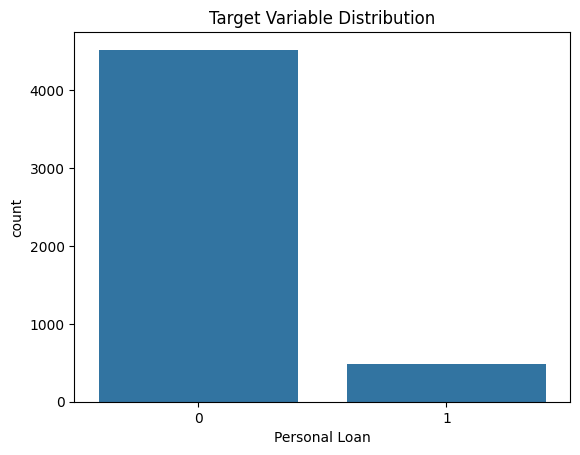

In [11]:
# Target variable distribution
sns.countplot(x='Personal Loan', data=data)
plt.title('Target Variable Distribution')
plt.show()

In [22]:
# Step 3: Data Preprocessing and Train-Test Split
# Separate features (X) and target variable (y)
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Ensure feature consistency between train and test datasets
assert X_train.shape[1] == X_test.shape[1], "Feature mismatch between training and testing datasets!"

# Standardize continuous features for GaussianNB
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data only
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transform features to positive range for MultinomialNB
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)  # Fit on training data only
X_train_positive = min_max_scaler.transform(X_train)
X_test_positive = min_max_scaler.transform(X_test)


In [23]:
# Step 4: Train Gaussian Naive Bayes Classifier
# GaussianNB works well with continuous data
print("Training Gaussian Naive Bayes Classifier...")
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

Training Gaussian Naive Bayes Classifier...


In [24]:
# Step 5: Train Multinomial Naive Bayes Classifier
# MultinomialNB is suitable for categorical/discrete data
print("Training Multinomial Naive Bayes Classifier...")
mnb = MultinomialNB()
mnb.fit(X_train_positive, y_train)
y_pred_mnb = mnb.predict(X_test_positive)

Training Multinomial Naive Bayes Classifier...


GaussianNB Accuracy: 0.88
MultinomialNB Accuracy: 0.90


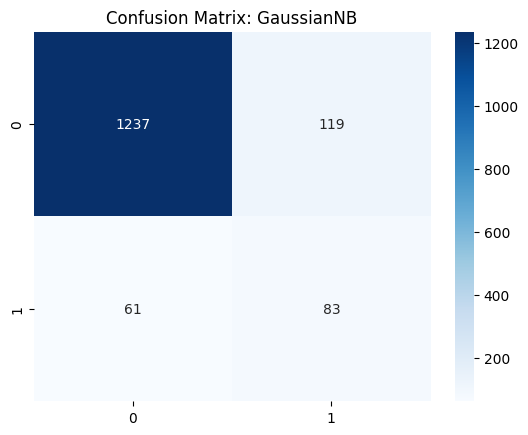

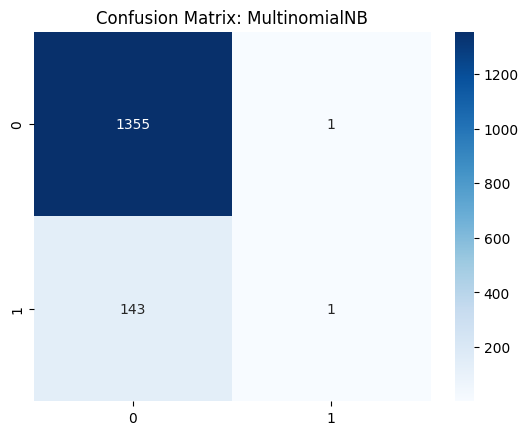

GaussianNB CV Mean Accuracy: 0.88
MultinomialNB CV Mean Accuracy: 0.91


In [25]:
# Step 6: Accuracy Scores and Confusion Matrices
# Calculate accuracy for both classifiers
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

print(f"GaussianNB Accuracy: {accuracy_gnb:.2f}")
print(f"MultinomialNB Accuracy: {accuracy_mnb:.2f}")

# Confusion matrices
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: GaussianNB')
plt.show()

sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: MultinomialNB')
plt.show()

# Cross-validation to check model consistency
cv_scores_gnb = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
cv_scores_mnb = cross_val_score(mnb, X_train_positive, y_train, cv=5)

print(f"GaussianNB CV Mean Accuracy: {cv_scores_gnb.mean():.2f}")
print(f"MultinomialNB CV Mean Accuracy: {cv_scores_mnb.mean():.2f}")

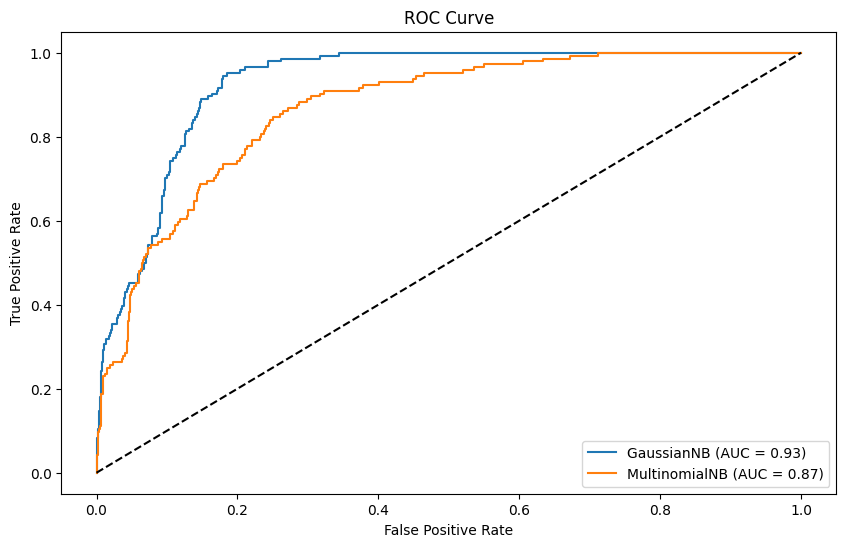

In [26]:
# Step 7: ROC Curve
# Probabilities for the ROC curve
probs_gnb = gnb.predict_proba(X_test_scaled)[:, 1]
probs_mnb = mnb.predict_proba(X_test_positive)[:, 1]

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, probs_gnb)
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, probs_mnb)

roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_mnb, tpr_mnb, label=f'MultinomialNB (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [27]:
# Step 8: Interpretation
# Classification reports for both classifiers
print("\nGaussianNB Classification Report:\n", classification_report(y_test, y_pred_gnb))
print("\nMultinomialNB Classification Report:\n", classification_report(y_test, y_pred_mnb))


GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1356
           1       0.41      0.58      0.48       144

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500


MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1356
           1       0.50      0.01      0.01       144

    accuracy                           0.90      1500
   macro avg       0.70      0.50      0.48      1500
weighted avg       0.87      0.90      0.86      1500

